# 1. statistical relationships
## replot( )
一种figure-level的函数，里面放两个axes-level函数——**scatterplot()**和**lineplot()**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

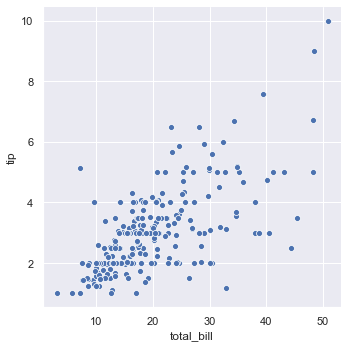

In [2]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips);

从上可知，scatter是默认的函数

In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


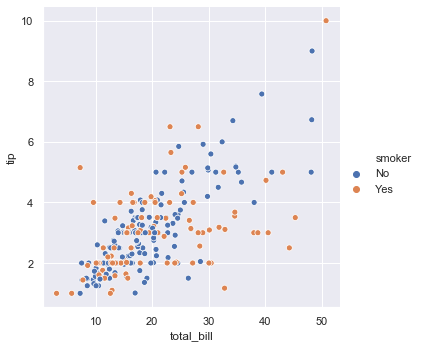

In [6]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', data = tips);

hue是“色调”，也可以作为第三个维度的分类。另外可以通过style来分组，里面只能放data中的列，是在hue基础上进行的！若hue中放入数值型数据会生成序列色盘

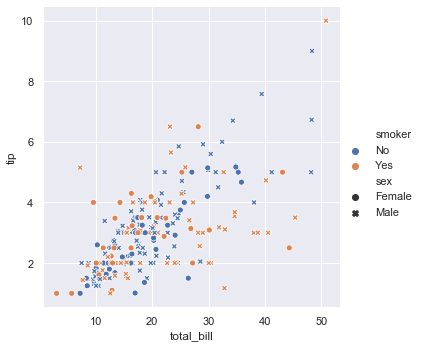

In [10]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', style = 'sex', data = tips);

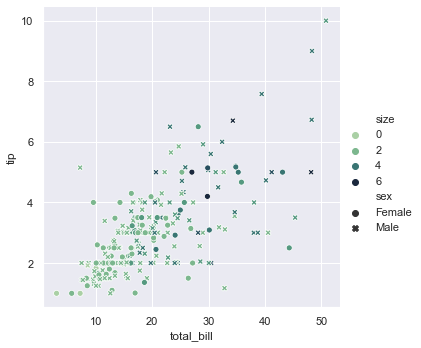

In [12]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'size', style = 'sex', palette='ch:r=-.5,l=.75', data = tips);

如上还可以自定义调色板

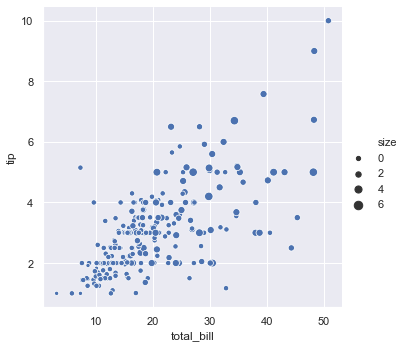

In [13]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

如上，size、x、y、style、hue都必须放入data中的列，同时size大小可以通过sizes调整，包含最大值和最小值

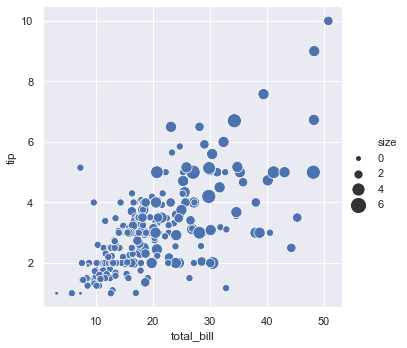

In [15]:
sns.relplot(x="total_bill", y="tip", size="size", sizes = (15, 200), data=tips);

## 使用线形图强调连续性
因为默认是散点图，这里需要设置kind ='line'

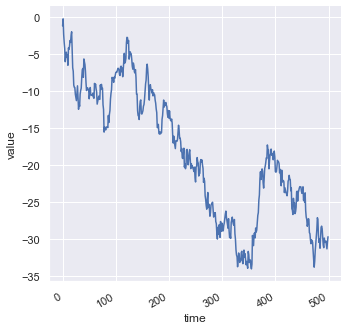

In [16]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

默认会将x的值排序，然后作图，也可以取消该默认排序

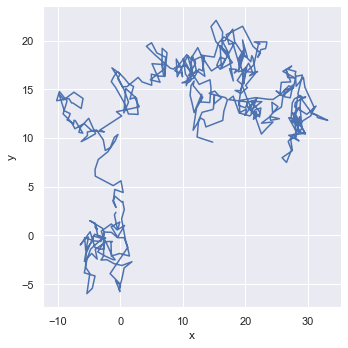

In [19]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
g = sns.relplot(x="x", y="y", kind="line", sort= False, data=df)

In [21]:
fmri = sns.load_dataset("fmri")
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


当同一个x值有多个y值映射时会生成一个聚合曲线，实现为该x对应的平均值区域为95%置信度区间，可以通过ci = None来取消显示置信区间

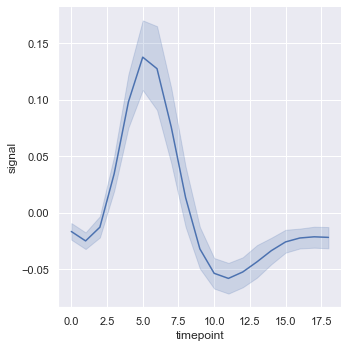

In [23]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

也可以使用标准差来估计，如下。不使用估计可以设置estimator=None

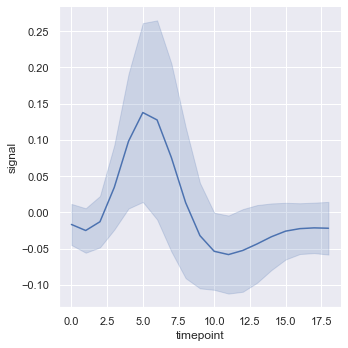

In [24]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);

## lineplot的hue
同scatter一样可以借助hue来实现三个维度的可视化，所用的参数也相同

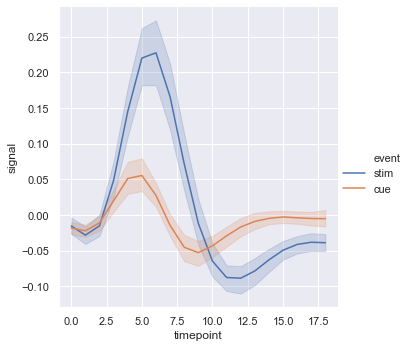

In [25]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);

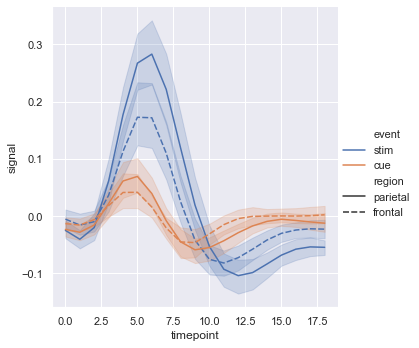

In [26]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", style = 'region', data=fmri);

另外可以控制线样式和记号样式

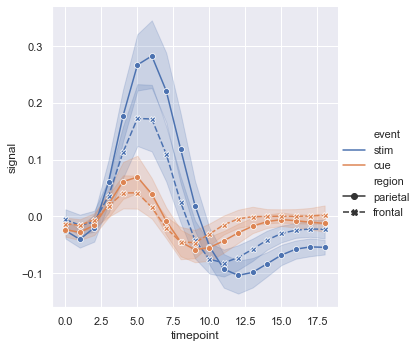

In [27]:
sns.relplot(x="timepoint", y="signal", hue="event", 
            kind="line", style = 'region', markers = True,data=fmri);

对于一个数据集有多个取样数据，所以一个x对应n个y值时，可以对每次取样分别作出一个图形，这样做时，estimator必须设置为None，当然，不用units也可以使用hue和styles来实现

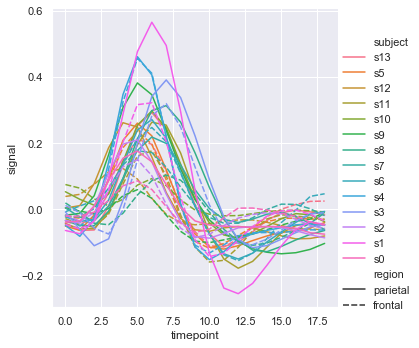

In [39]:
sns.relplot(x="timepoint", y="signal", hue="subject",style ='region',
            units="subject",estimator=None, kind="line", data=fmri.query("event == 'stim'"));

## 使用日期数据作图

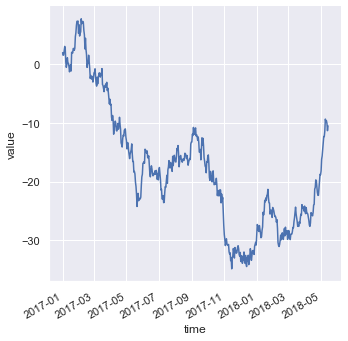

In [42]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

最后一句是调整x轴的日期样式的

## 展示多维度关系(两个变量在其他变量条件下的相关)

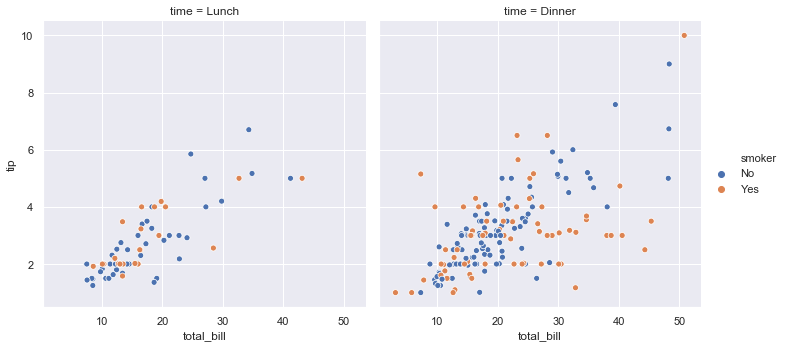

In [43]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

有上可知，是通过第三个变量来研究相关，同时可以通过row来设置第四个变量

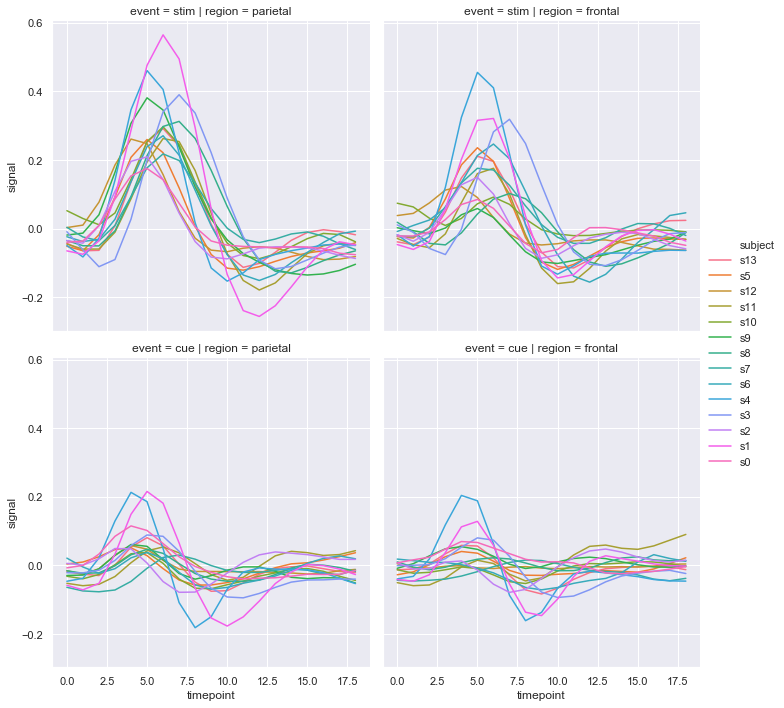

In [50]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height = 5,
            kind="line", estimator=None, data=fmri);

height是控制每个面的大小，如果col的列数很多可以使用col_wrap来换行显示

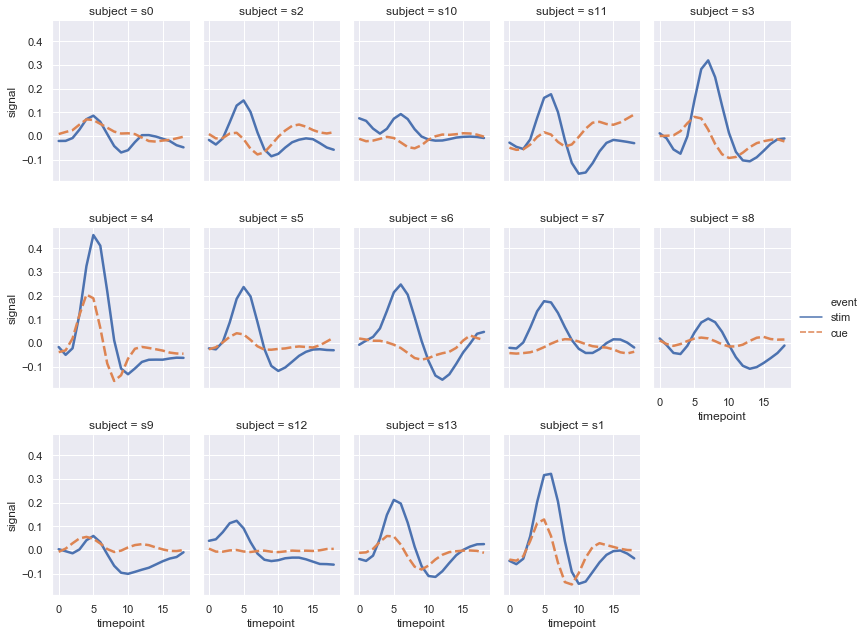

In [51]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));

aspect控制宽度——即width = aspect*height

---
# 2. Plotting with categorical data
使用一个figure-level的函数catplot来获取对多个axes-level函数的调用，来探索类别数据的关系

## 1.类别型散点图
有stripplot、swarmplot两种，与上一节的点图不同，这里是类别数据和数量数据的关系

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

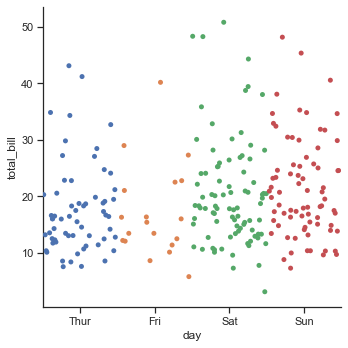

In [68]:
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", jitter = 0.5, data=tips);

此处可控制参数jitter设置显示点的离散程度，jitter = 1/True时按系统默认处理，其他情况数字越大越离散

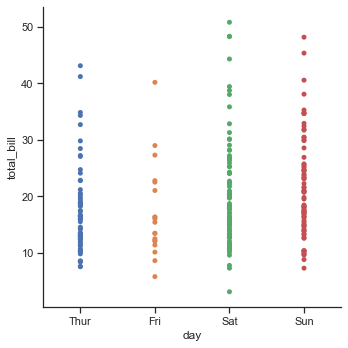

In [70]:
sns.catplot(x="day", y="total_bill", jitter=False, data=tips);

第二种点图能更好的观察数据的分布

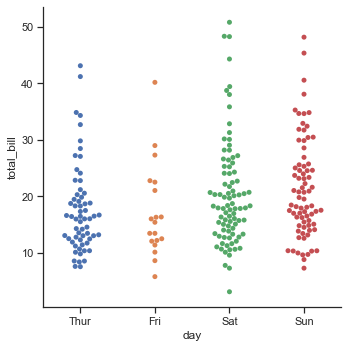

In [71]:
sns.catplot(x ='day', y='total_bill', kind = 'swarm', data = tips);

同样，也有hue，但是不支持style、size

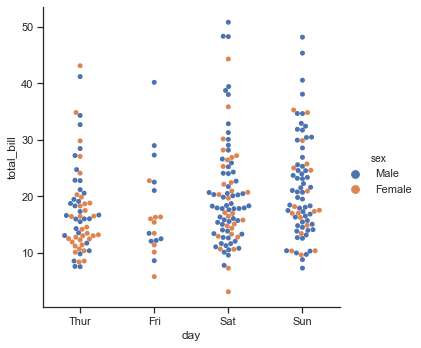

In [73]:
sns.catplot(x="day", y="total_bill", kind="swarm", hue = 'sex', data=tips);

默认会按照数据本身的类别排序或是按照数值自动排序，也可以使用order参数指定排序

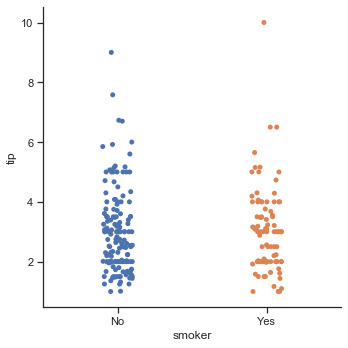

In [74]:
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips);

控制水平和垂直方向可以直接交换x和y的数据即可实现

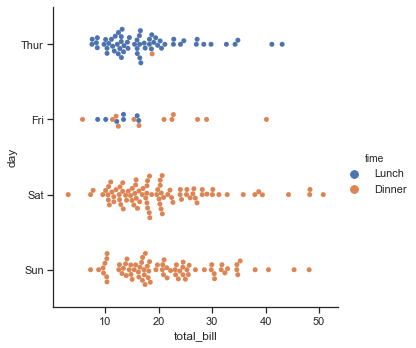

In [75]:
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips);

## 2. 类别分布图
包括箱型图、boxen、violin

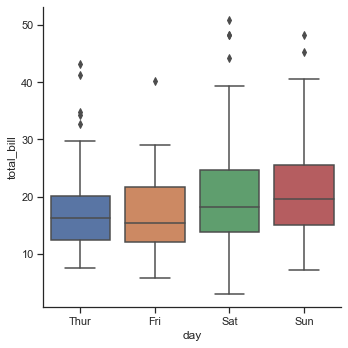

In [76]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

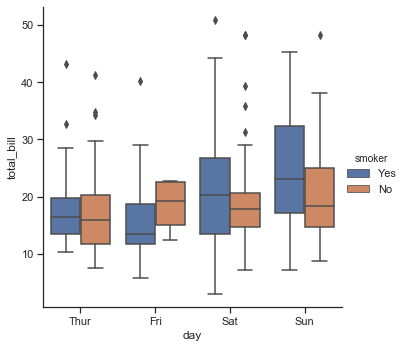

In [77]:
sns.catplot(x="day", y="total_bill", kind="box", hue="smoker",  data=tips);

可以使用boxen，得到不止四分位数的箱型图而是划分为更多区间，对于大数据集更好分析分布

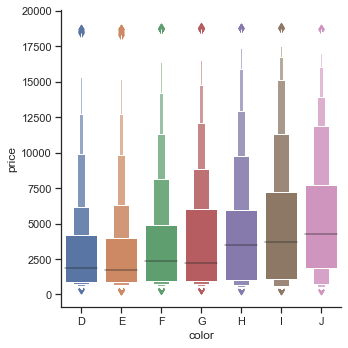

In [79]:
diamonds = sns.load_dataset("diamonds")
sns.catplot(x="color", y="price", kind="boxen",
            data=diamonds.sort_values("color"));

除此之外，可以使用violin获得更加平滑的分布图，该方法使用核密度估计获得对数据分布更多信息描述，除此之外，还在内部显示出分位点和上下限，缺点是需要调整参数

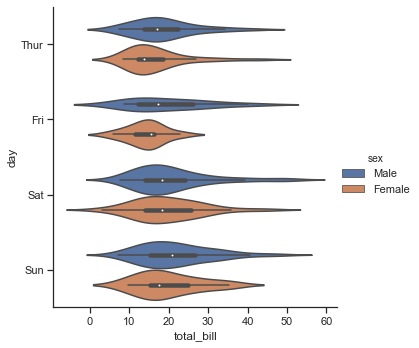

In [80]:
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", data=tips);

以上是将hue分成多个类别单独呈现，也可以使用split将hue在一个图上呈现，更节约空间

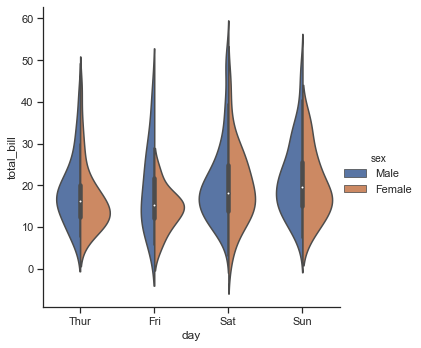

In [81]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=tips);

可以在violin内部设置显示所有样本点，以及在一个途中同时显示多种图形

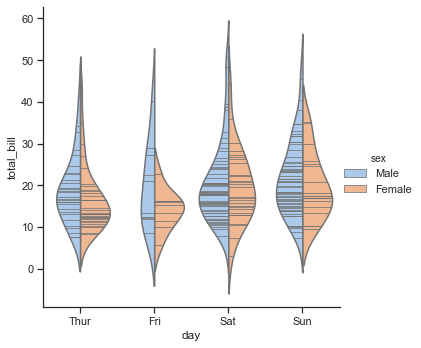

In [82]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=tips);

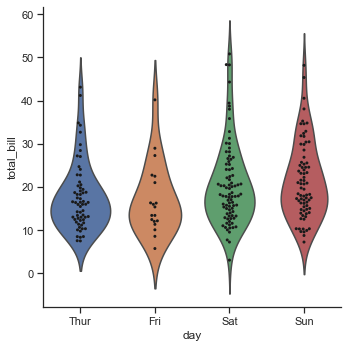

In [83]:
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax);

这里使用了ax参数，即在该图基础上生成另一个图，同时axes-level函数里的参数名和figurelevel相同，用法完全不同

## 3. 类别统计估计图
包括bar、point、

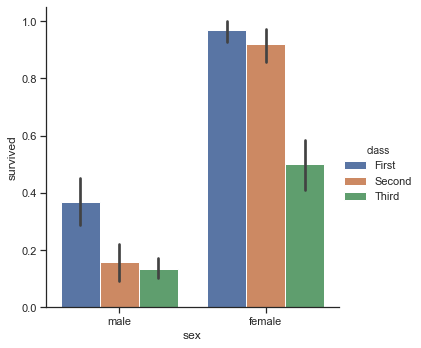

In [84]:
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

高度默认是均值，竖线是置信区间，这里是对统计量生成的条形图，若要生成频数分布，则调整kind = count

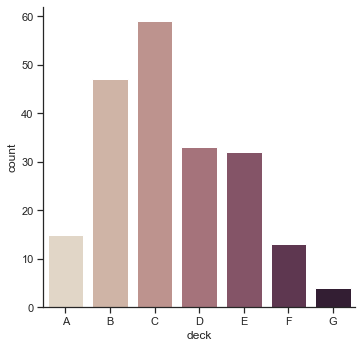

In [85]:
sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic);

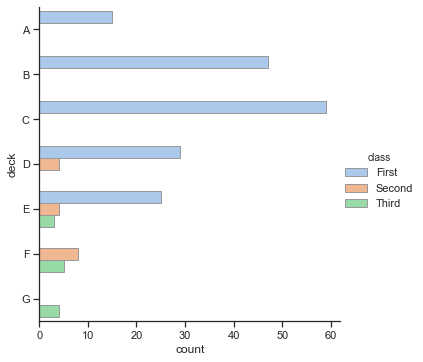

In [88]:
sns.catplot(y="deck", hue="class", kind="count",
            palette="pastel", edgecolor=".6",
            data=titanic);

以上palette控制调色板样式，edgecolor控制条形边框颜色

### 使用点图来获得统计量的同时，对比hue对应的各个分类的关系

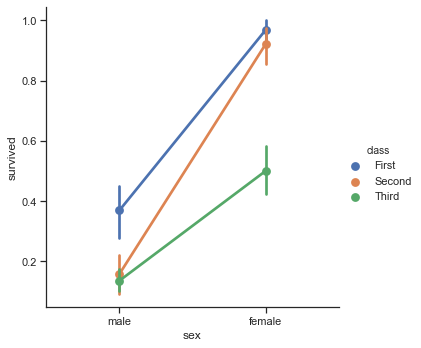

In [89]:
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic);

即便不支持style参数，也可以使用marker和linestyles实现各类样式

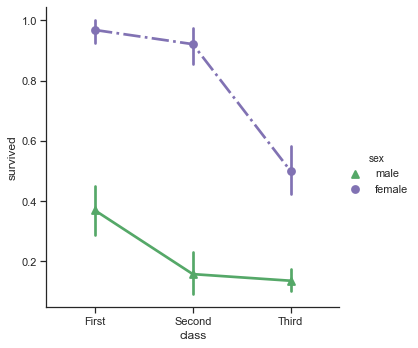

In [213]:
sns.catplot(x="class", y="survived", hue="sex",
            palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "-."],
            kind="point", data=titanic);

在此处，没有marker和dashes的参数，只有用markers和linstyles实现样式，均是针对hue的类别实现的

可以直接对data求各个字段的图表，如下

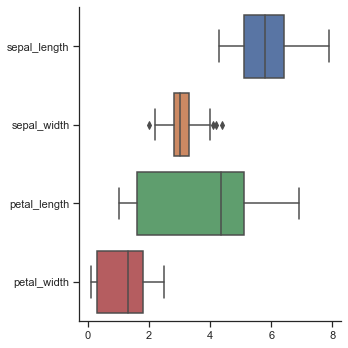

In [97]:
iris = sns.load_dataset("iris")
sns.catplot(data=iris, orient="h", kind="box");

一般情况不需要使用orient，但是当分类变量是数值型时，函数会混淆故这里用orient控制方向，这个参数仅限于box才需要，不然会出错，另外可明确通过axes-level函数制图

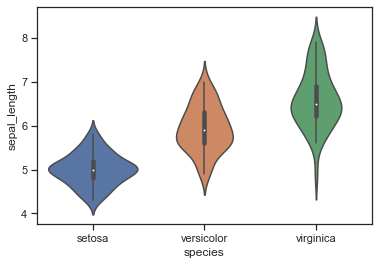

In [98]:
sns.violinplot(x=iris.species, y=iris.sepal_length);

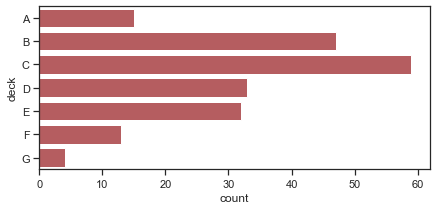

In [100]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="deck", data=titanic, color="r");

### 比较不同面的多重关系，类似上一节，设置row和col即可

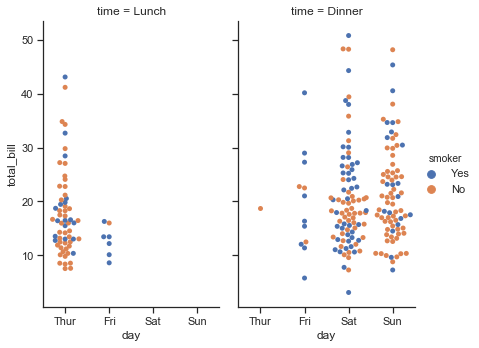

In [101]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.6,
            kind="swarm", data=tips);

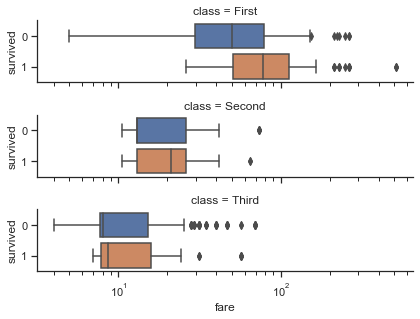

In [104]:
g = sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))
g.set(xscale="log");

---
# 3. 可视化数据集分布 
包括distplot、kdeplot、rugplot、jointplot、pairplot

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)

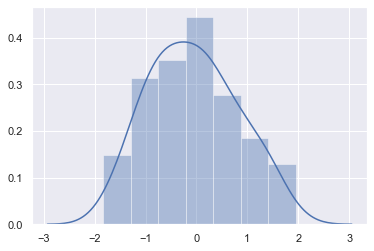

In [107]:
x = np.random.normal(size=100)
sns.distplot(x);

distplot可以作rug和kde，rug是指原数据在轴上的位置对应，通过内部参数可控制，默认是生成一个频率直方图hist，即一个distplot可以生成hist、kde、rug三种图，其中hist和kde默认为True

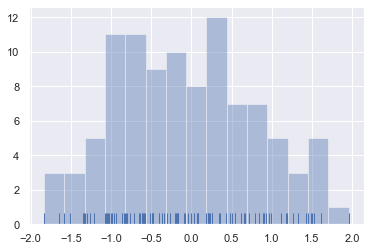

In [110]:
sns.distplot(x, bins= 15, kde=False, rug=True);

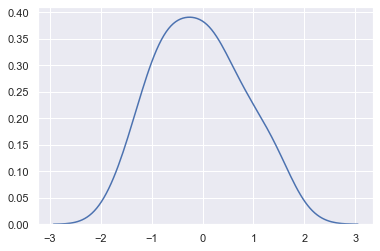

In [113]:
sns.distplot(x, hist = False);

可以使用kdeplot直接获取kde图

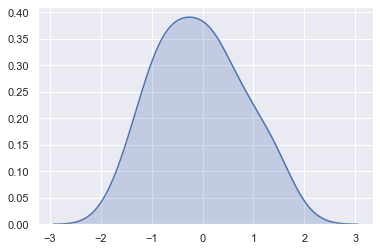

In [114]:
sns.kdeplot(x, shade=True);

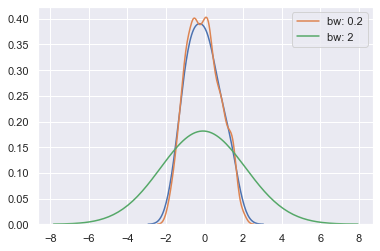

In [135]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

bandwidth控制对原数据拟合的紧凑程度，类似于hist的bins

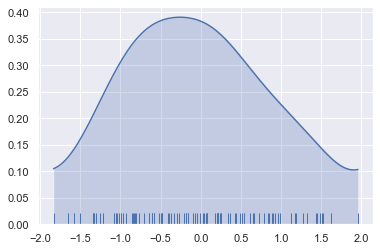

In [136]:
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x);

cut control how far past the extreme values the curve is drawn

### 使用统计模型去拟合数据，观察拟合程度

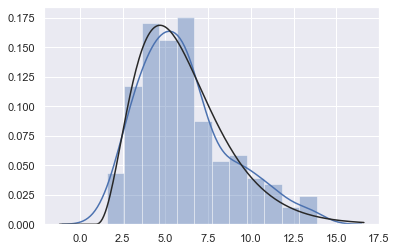

In [138]:
x = np.random.gamma(6, size=200)
sns.distplot(x, fit=stats.gamma);

## 二元分布

In [140]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

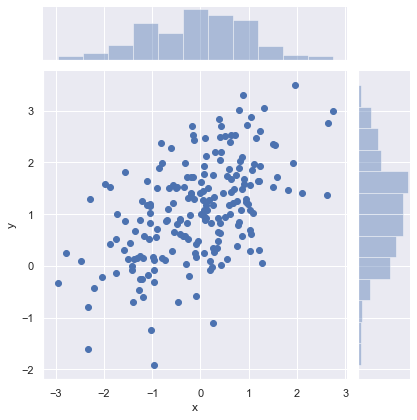

In [141]:
sns.jointplot(x="x", y="y", data=df);

既实现了散点图又提供了各自的分布情况的一种求相关的方式，另可通过kind改变样式

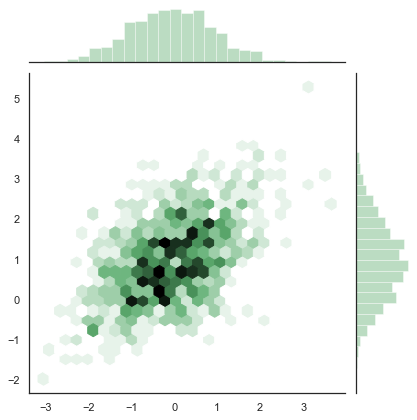

In [144]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="g");

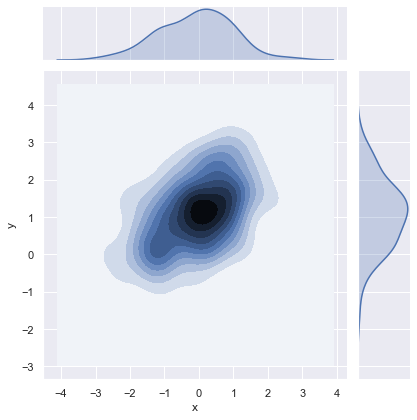

In [145]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

也可以通过一般的axes-level函数实现上图

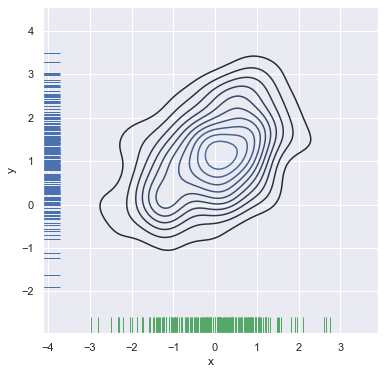

In [146]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

### 可视化配对数据关系

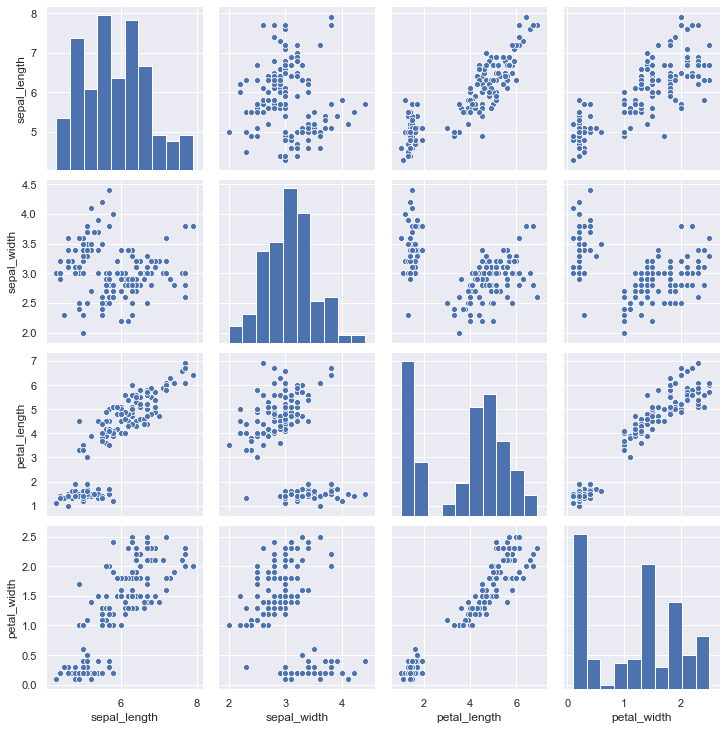

In [147]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

如果加入hue参默认将直方图样式改变成kde图形

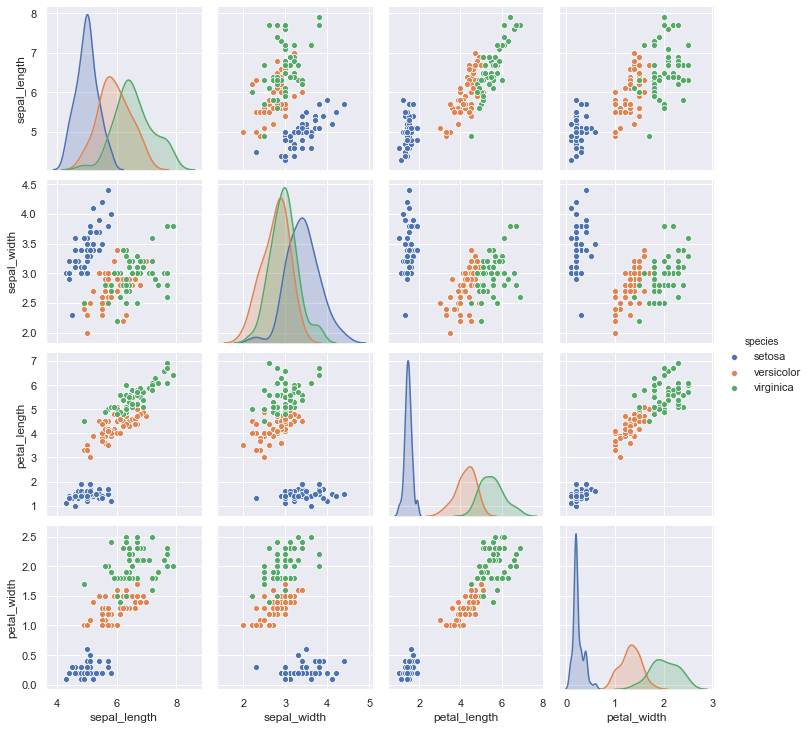

In [148]:
sns.pairplot(iris, hue="species");

可以直接使用底层的pairgrid创建

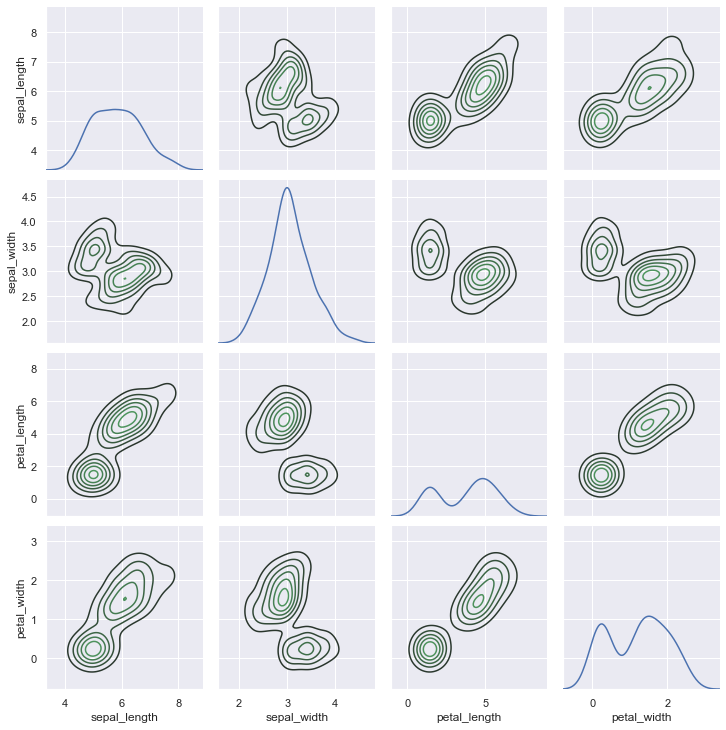

In [151]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6, color = 'g');

---
# 4. 可视化线性关系
regplot()、lmplot()，生成一个散点图和一个回归曲线和一个95%置信区间

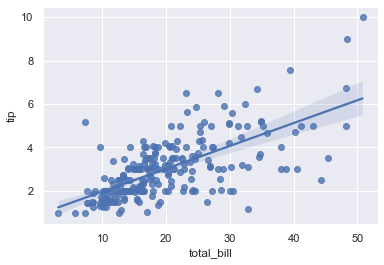

In [152]:
sns.regplot(x="total_bill", y="tip", data=tips);

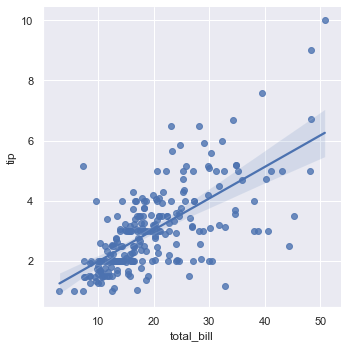

In [153]:
sns.lmplot(x="total_bill", y="tip", data=tips);

lmplot相对于regplot对data的要求更严格，因此regplot更灵活

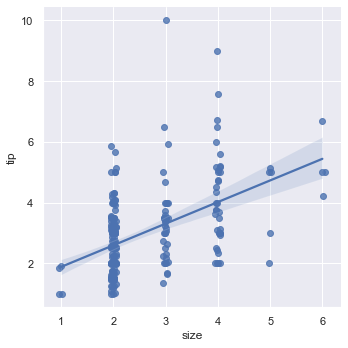

In [155]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);

jitter就是随机噪声，让分布更加清晰，同时不会影响回归线，只影响散点图

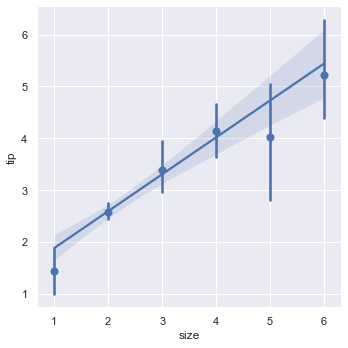

In [156]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

另外可以通过x_estimator来折叠散点生成一个均值附加置信区间

## 拟合不同的模型

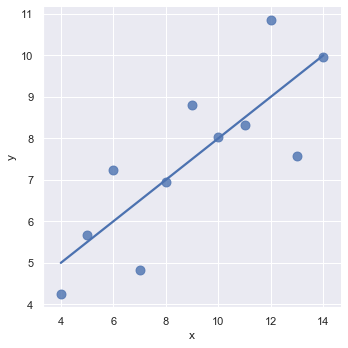

In [157]:
anscombe = sns.load_dataset("anscombe")
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

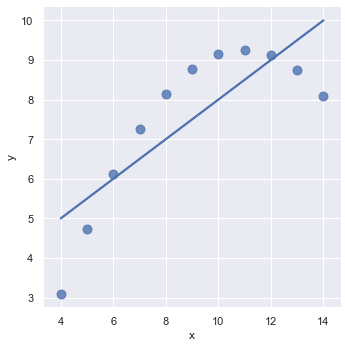

In [158]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

如上，不同的数据集却表现出完全相同的直线模型，可知，简单回归模型不能很好的拟合这些数据，因此可以使用多项式回归参数实现

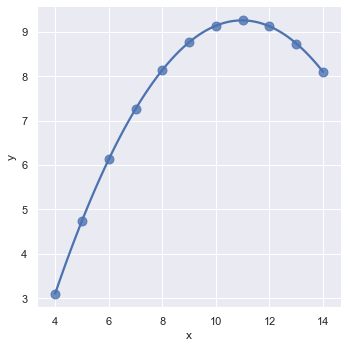

In [159]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

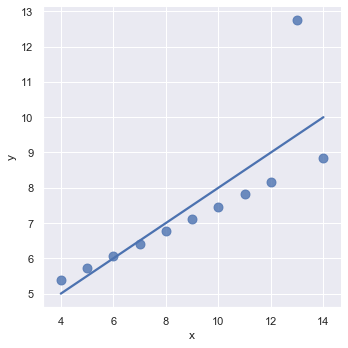

In [160]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

上面的情况是有一个值明显是异常值，故需要删除这部分异常值生成一个更有用的模型，用到robust参数，这里scatter_kws控制scatter的参数

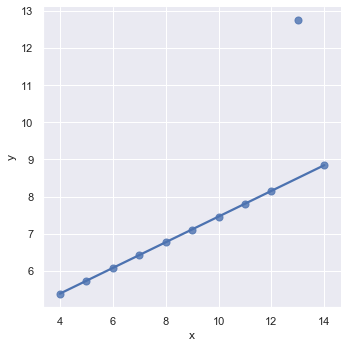

In [162]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 50});

如果是二元分布的话，也可以通过设置参数修正

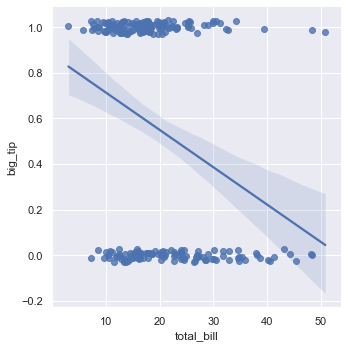

In [164]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

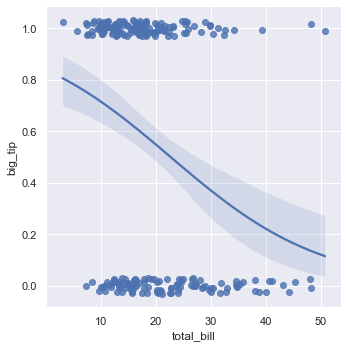

In [165]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

使用非参数回归

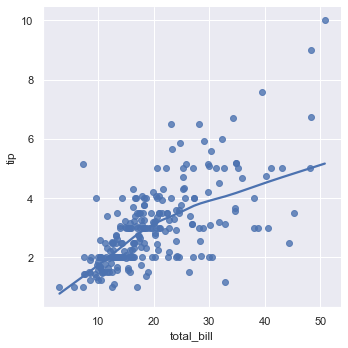

In [166]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True);

使用residplot(残差图)判断该数据集是否时候简单线性模型

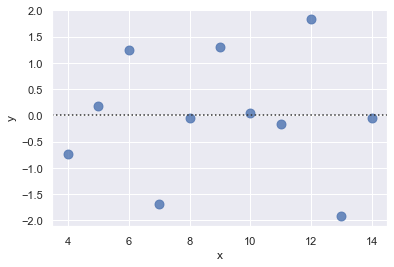

In [167]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

## 以其他变量作为条件
regplot只能显示一个关系图，而lmplot拼接多个regplot，故能够显示多个图

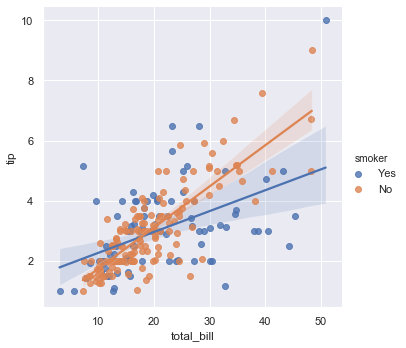

In [168]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

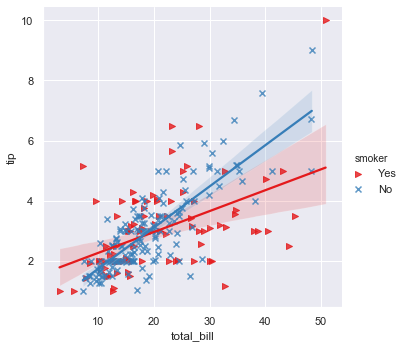

In [174]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=[">", "x"],palette="Set1");

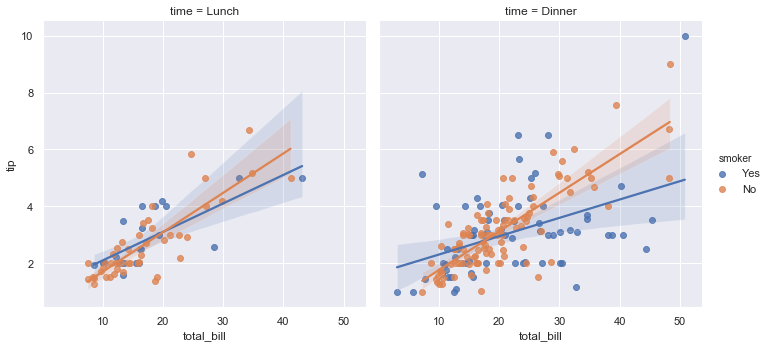

In [175]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

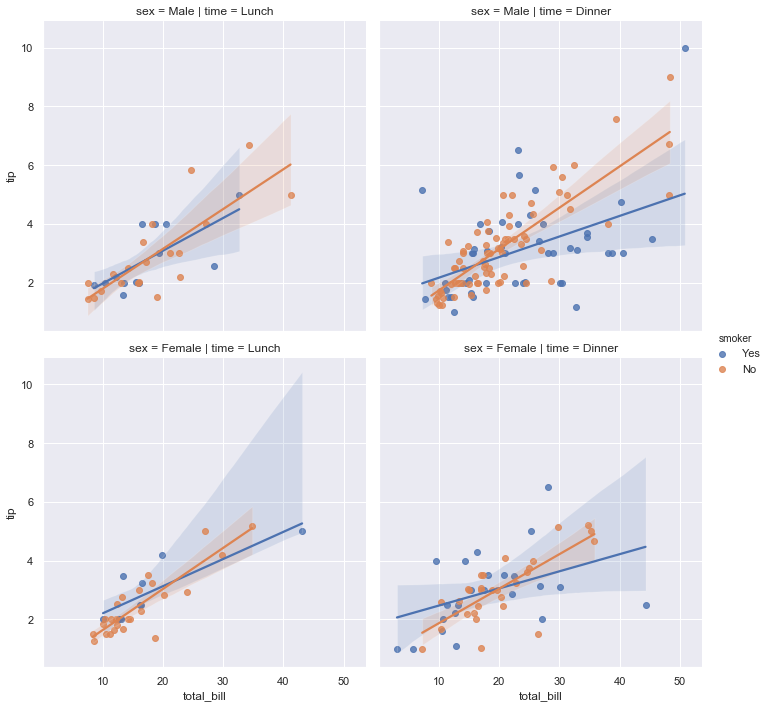

In [176]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);

## 控制图形的形状和大小
figsize、height、col_wrap

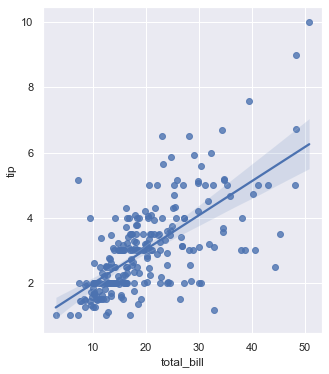

In [177]:
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax);

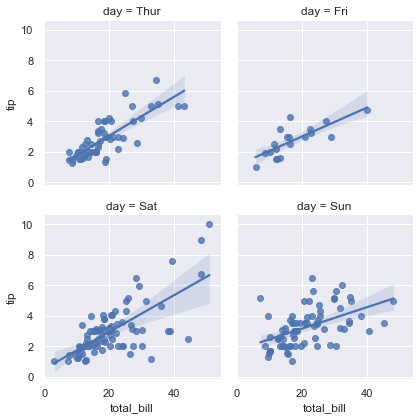

In [178]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, height=3);

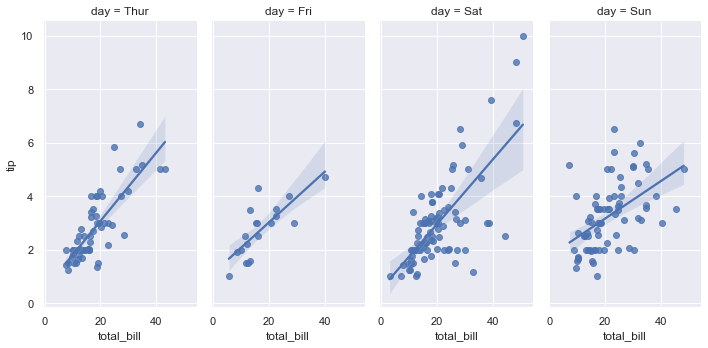

In [179]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=.5);

## 在其他背景下画回归图形

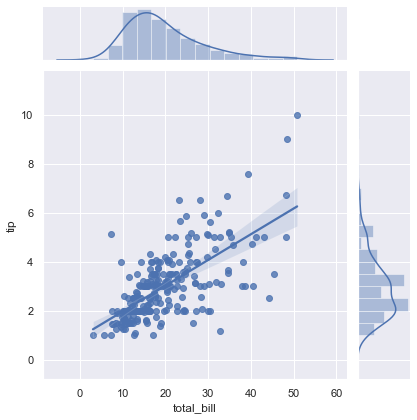

In [180]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

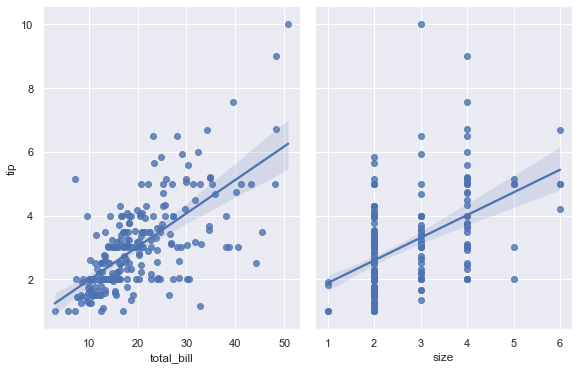

In [181]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             height=5, aspect=.8, kind="reg");

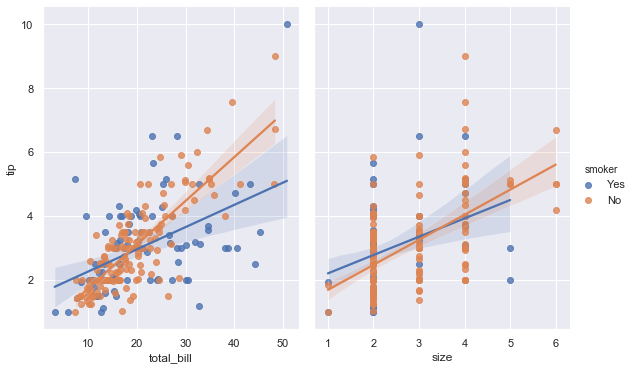

In [182]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", height=5, aspect=.8, kind="reg");

以上均在kind中设置为回归模式即可

---
# 5. 画结构化多图栅格
必须满足tidy data

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")

### 小型多图
facetgrid用于可视化不同变量的分布或是多个变量的两两关系

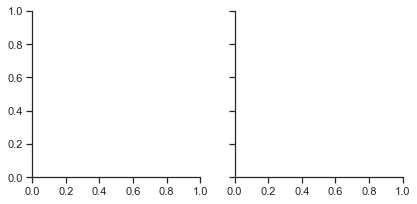

In [184]:
tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, col="time")

以上仅是初始化了栅格，尚未作图，需要作图必须使用facetgrid.map()，里面放绘图函数和变量名

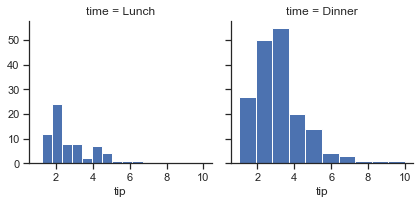

In [185]:
g = sns.FacetGrid(tips, col="time")
g.map(plt.hist, "tip");

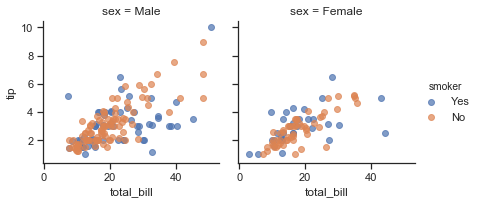

In [187]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();

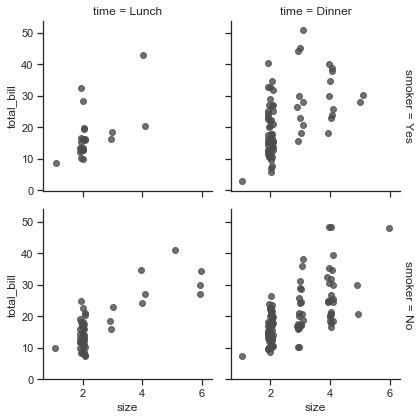

In [190]:
g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
g.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1);

map后可接一连串关键词参数，此外，画布尺寸通过facegrid来调整.order控制顺序

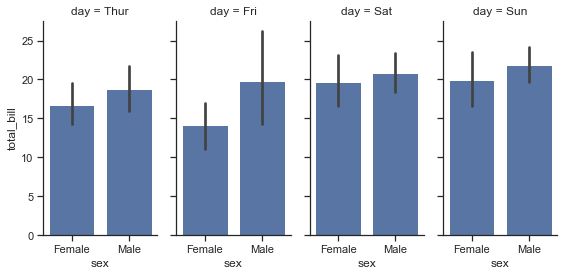

In [194]:
g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill", order = ['Female','Male']);

同样可在grid中设置顺序

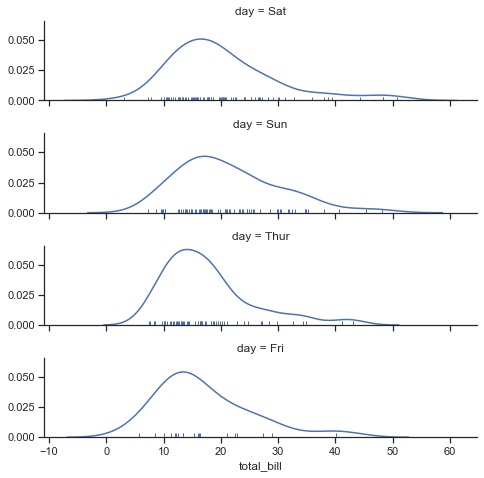

In [195]:
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(tips, row="day", row_order=ordered_days,
                  height=1.7, aspect=4,)
g.map(sns.distplot, "total_bill", hist=False, rug=True);

在grid中自定义调色板、hue、order、size、样式、ylim...

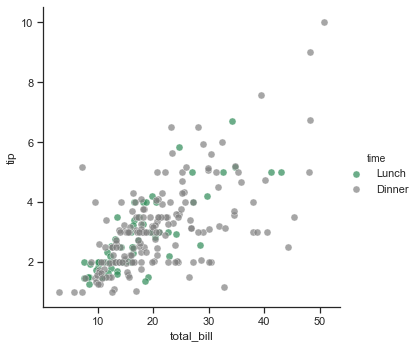

In [196]:
pal = dict(Lunch="seagreen", Dinner="gray")
g = sns.FacetGrid(tips, hue="time", palette=pal, height=5)
g.map(plt.scatter, "total_bill", "tip", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

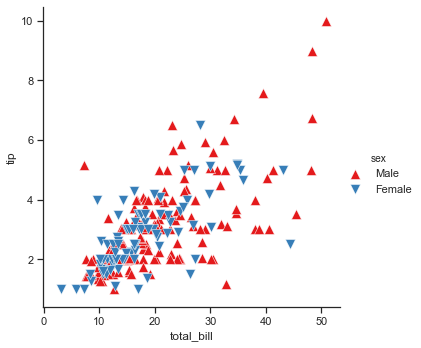

In [197]:
g = sns.FacetGrid(tips, hue="sex", palette="Set1", height=5, hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter, "total_bill", "tip", s=100, linewidth=.5, edgecolor="white")
g.add_legend();

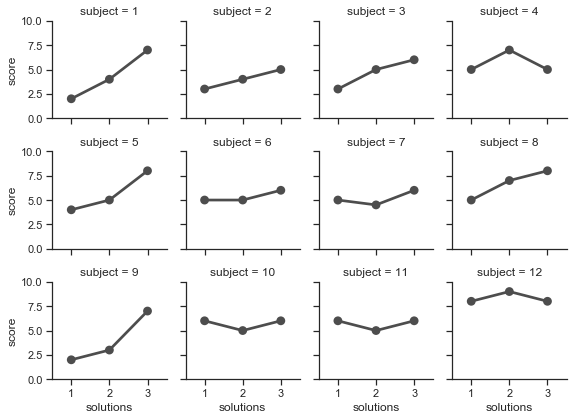

In [198]:
attend = sns.load_dataset("attention").query("subject <= 12")
g = sns.FacetGrid(attend, col="subject", col_wrap=4, height=2, ylim=(0, 10))
g.map(sns.pointplot, "solutions", "score", order=[1, 2, 3], color=".3", ci=None);

### 设置轴标签、刻度等方法

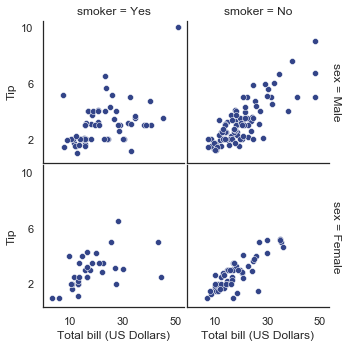

In [199]:
with sns.axes_style("white"):
    g = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True, height=2.5)
g.map(plt.scatter, "total_bill", "tip", color="#334488", edgecolor="white", lw=.5);
g.set_axis_labels("Total bill (US Dollars)", "Tip");
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10]);
g.fig.subplots_adjust(wspace=.02, hspace=.02);

可调用facetgrid中的每个axe对象

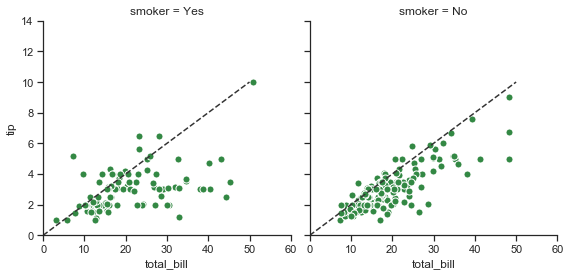

In [200]:
g = sns.FacetGrid(tips, col="smoker", margin_titles=True, height=4)
g.map(plt.scatter, "total_bill", "tip", color="#338844", edgecolor="white", s=50, lw=1)
for ax in g.axes.flat:
    ax.plot((0, 50), (0, .2 * 50), c=".2", ls="--")
g.set(xlim=(0, 60), ylim=(0, 14));

## 可以自定义作图函数

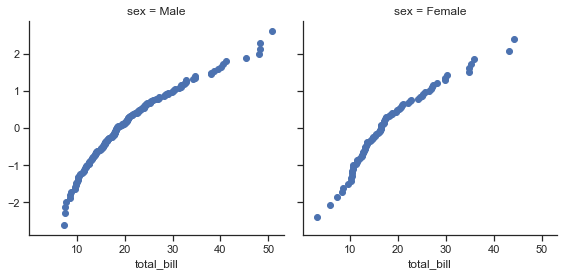

In [201]:
from scipy import stats
def quantile_plot(x, **kwargs):
    qntls, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, qntls, **kwargs)

g = sns.FacetGrid(tips, col="sex", height=4)
g.map(quantile_plot, "total_bill");

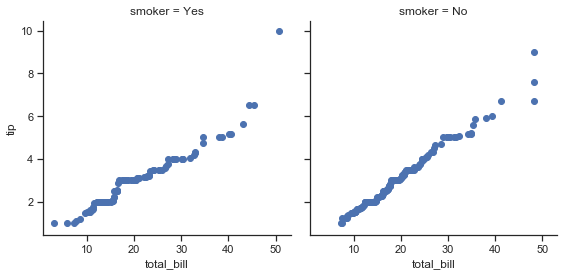

In [202]:
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)

g = sns.FacetGrid(tips, col="smoker", height=4)
g.map(qqplot, "total_bill", "tip");

## 配对图
pairplot的底层函数pairgrid

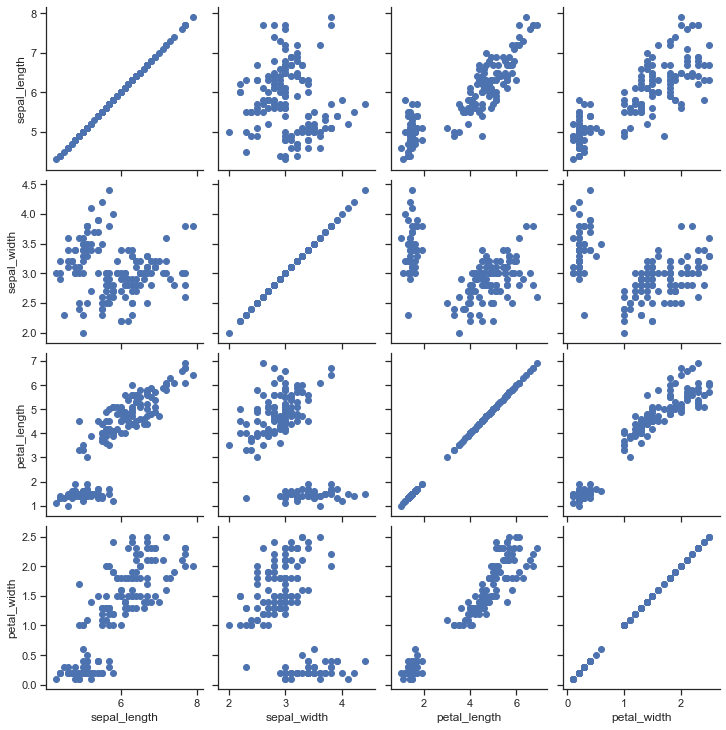

In [203]:
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris)
g.map(plt.scatter);

对角线是自己和自己组成一个配对图，可以显示不同类别的图形，如下图对角线使用直方图，其他位置使用散点图

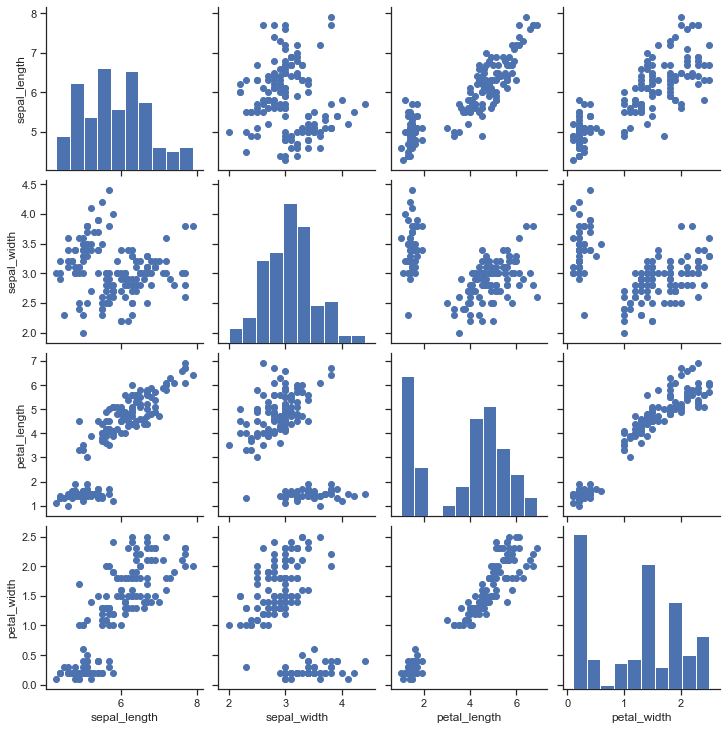

In [208]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

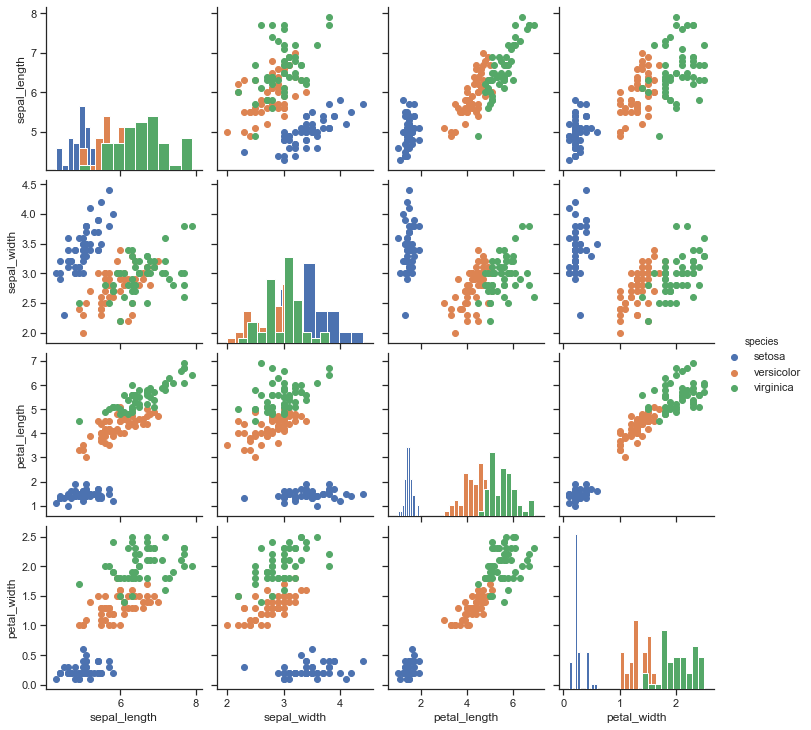

In [209]:
g = sns.PairGrid(iris, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

选择部分列配对作图

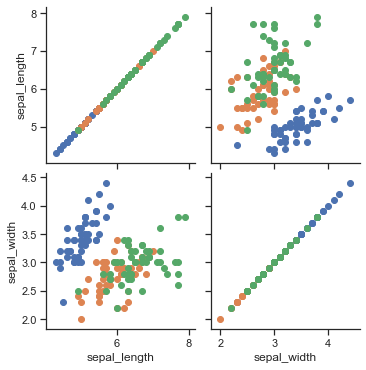

In [210]:
g = sns.PairGrid(iris, vars=["sepal_length", "sepal_width"], hue="species")
g.map(plt.scatter);

根据位置使用不同的函数

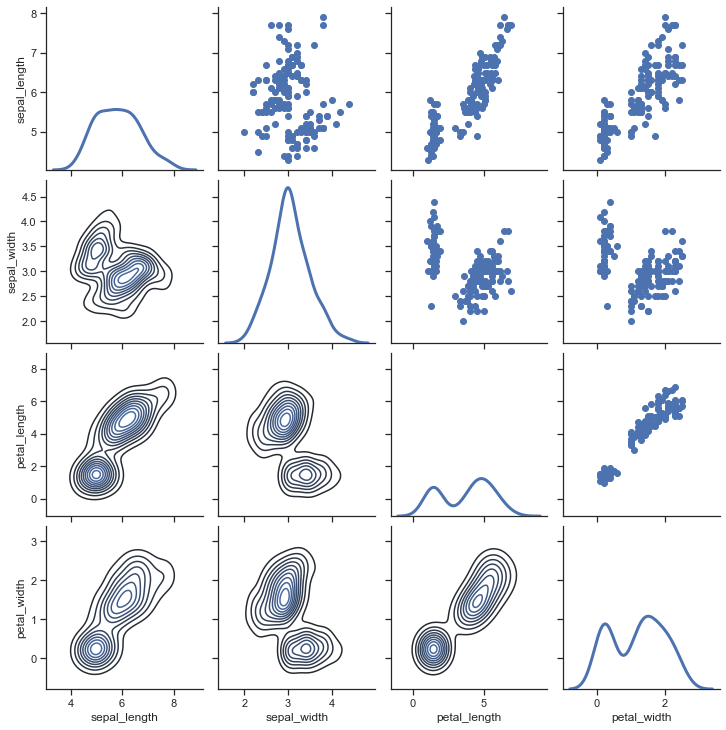

In [211]:
g = sns.PairGrid(iris)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False);

不使用两两配对

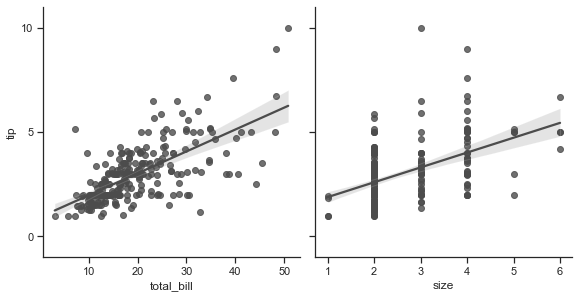

In [212]:
g = sns.PairGrid(tips, y_vars=["tip"], x_vars=["total_bill", "size"], height=4)
g.map(sns.regplot, color=".3")
g.set(ylim=(-1, 11), yticks=[0, 5, 10]);